In [10]:
# ############ Created to convert validation.txt .wav to .jpg
# #!/usr/bin/env python
# import os, sys

# stext = '.wav'
# rtext = '.jpg'
# input = open('./data/train/validation_list.txt')
# output = open('./data/picts/train/validation_list.txt', 'w')
# for s in input.readlines(  ):
#     output.write(s.replace(stext, rtext))
# output.close(  )
# input.close(  )

In [11]:
from __future__ import print_function

import glob
import math
import os

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.python.data import Dataset
%matplotlib inline

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [12]:
# jpeg_data_tensor, decoded_image_tensor = add_jpeg_decoding(module_spec)

In [13]:
DATADIR = './data' # unzipped train and test data
OUTDIR = './model-k' # just a random name
# Data Loading
import os
import re
from glob import glob

# POSSIBLE_LABELS = 'tree five dog happy go right silence marvin no eight one bed bird nine\
#             wow two on stop house left seven three sheila zero cat four off yes down up six'.split()
# POSSIBLE_LABELS = 'yes no up down left right on off stop go silence tree five dog happy\
#               marvin eight one bed bird nine wow two house seven three sheila zero cat four six'.split()
# POSSIBLE_LABELS = 'yes no up down left right on off stop go silence unknown'.split()
POSSIBLE_LABELS = 'no yes'.split()
id2name = {i: name for i, name in enumerate(POSSIBLE_LABELS)}
name2id = {name: i for i, name in id2name.items()}

'''
load data
change text file to .jpg
change path to data/picts/train/*/*jpg
'''


def load_data(data_dir):
    """ Return 2 lists of tuples:
    [(class_id, user_id, path), ...] for train
    [(class_id, user_id, path), ...] for validation
    """
    # Just a simple regexp for paths with three groups:
    # prefix, label, user_id
    pattern = re.compile("(.+\/)?(\w+)\/([^_]+)_.+jpg")
    all_files = glob(os.path.join(data_dir, 'picts/train/*/*jpg'))

    with open(os.path.join(data_dir, 'picts/train/validation_list.txt'), 'r') as fin:
        validation_files = fin.readlines()
    valset = set()
    for entry in validation_files:
        r = re.match(pattern, entry)
        if r:
            valset.add(r.group(3))

    possible = set(POSSIBLE_LABELS)
    train, val = [], []
    for entry in all_files:
        r = re.match(pattern, entry)
        if r:
            label, uid = r.group(2), r.group(3)
            if label == '_background_noise_':
                label = 'silence'
            if label not in possible:
                label = 'unknown'
            else:
                label_id = name2id[label]

                sample = (label_id, uid, entry)
                if uid in valset:
                    val.append(sample)
                else:
                    train.append(sample)

    print('There are {} train and {} val samples'.format(len(train), len(val)))
    return train, val

first_trainset, first_valset = load_data(DATADIR)

There are 4221 train and 531 val samples


In [14]:
###### Check this 'eb9c403fc'

In [15]:
# valset = first_valset##[]
# trainset = first_trainset#[]

In [16]:
# POSSIBLE_LABELS = 'yes no'.split()
# id2name = {i: name for i, name in enumerate(POSSIBLE_LABELS)}
# name2id = {name: i for i, name in id2name.items()}

In [17]:
valset = [s for s in first_valset if s[0] != 2]
trainset = [s for s in first_trainset if s[0] != 2]# and s[0] != 11]

In [18]:
for idx2, i2 in enumerate(valset):
    print(idx2, i2)#[0])

0 (0, 'e6db3894', './data/picts/train/no/e6db3894_nohash_0.jpg')
1 (0, '29b81b73', './data/picts/train/no/29b81b73_nohash_0.jpg')
2 (0, 'bdee441c', './data/picts/train/no/bdee441c_nohash_0.jpg')
3 (0, '1657c9fa', './data/picts/train/no/1657c9fa_nohash_2.jpg')
4 (0, '56eb74ae', './data/picts/train/no/56eb74ae_nohash_2.jpg')
5 (0, '2e0d80f7', './data/picts/train/no/2e0d80f7_nohash_0.jpg')
6 (0, '86478fab', './data/picts/train/no/86478fab_nohash_0.jpg')
7 (0, 'bdee441c', './data/picts/train/no/bdee441c_nohash_1.jpg')
8 (0, 'dbb40d24', './data/picts/train/no/dbb40d24_nohash_3.jpg')
9 (0, 'b00dff7e', './data/picts/train/no/b00dff7e_nohash_0.jpg')
10 (0, '538e1856', './data/picts/train/no/538e1856_nohash_1.jpg')
11 (0, 'b6ebe225', './data/picts/train/no/b6ebe225_nohash_0.jpg')
12 (0, 'f17be97f', './data/picts/train/no/f17be97f_nohash_4.jpg')
13 (0, '44bc77f7', './data/picts/train/no/44bc77f7_nohash_0.jpg')
14 (0, 'e8c3c5ca', './data/picts/train/no/e8c3c5ca_nohash_0.jpg')
15 (0, '7fd25f7c', '

In [19]:
for idx, i in enumerate(trainset):
    print(idx, i[0])

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


In [20]:
import random
# print(valset[4001], POSSIBLE_LABELS[valset[4001][0]])
print(type(valset))
# print(trainset[0])
random.shuffle(trainset)
random.shuffle(valset)
print(valset)

<class 'list'>
[(1, 'c4cfbe43', './data/picts/train/yes/c4cfbe43_nohash_0.jpg'), (1, 'f17be97f', './data/picts/train/yes/f17be97f_nohash_2.jpg'), (1, '41285056', './data/picts/train/yes/41285056_nohash_4.jpg'), (0, 'f17be97f', './data/picts/train/no/f17be97f_nohash_4.jpg'), (1, '2296b1af', './data/picts/train/yes/2296b1af_nohash_0.jpg'), (0, '471a0925', './data/picts/train/no/471a0925_nohash_1.jpg'), (0, '41285056', './data/picts/train/no/41285056_nohash_1.jpg'), (0, 'bca56796', './data/picts/train/no/bca56796_nohash_1.jpg'), (0, '5fadb538', './data/picts/train/no/5fadb538_nohash_2.jpg'), (1, 'eee9b9e2', './data/picts/train/yes/eee9b9e2_nohash_0.jpg'), (0, '90804775', './data/picts/train/no/90804775_nohash_0.jpg'), (1, 'd197e3ae', './data/picts/train/yes/d197e3ae_nohash_1.jpg'), (0, 'b7a6f709', './data/picts/train/no/b7a6f709_nohash_0.jpg'), (1, '52bfbce8', './data/picts/train/yes/52bfbce8_nohash_0.jpg'), (0, 'b00dff7e', './data/picts/train/no/b00dff7e_nohash_0.jpg'), (0, 'dbb40d24', '

In [21]:
# from PIL import Image
# from numpy import array


#     img = Image.open(path)
#     img = img.resize((96, 96), Image.ANTIALIAS)
#     img = img.rotate(90) ## Possibly take this out
#     arr = array(img)
#     return arr

# def create_labels_and_examples(data):
#     # train = np.zeros(shape=(0, 96, 96, 3))
#     features = []
#     labels = []
#     for i in data:
#     #     arr = np.append(arr, [img_to_arr(i[2])], axis=0)
#         #append features
#         feature = img_to_arr(i[2])
#         features.append(feature)
        
#         # Append labels
#         label = i[0]
#         labels.append(label)
#         return np.array(features), np.array(labels)

In [22]:
from PIL import Image
from numpy import array


# train = np.zeros(shape=(0, 96, 96, 3))
def img_to_arr(path):
    img = Image.open(path)
    img = img.resize((96, 96), Image.ANTIALIAS)
    img = img.rotate(90) ## Possibly take this out
    arr = array(img)
    return arr

In [23]:
# def split_valid_to_training(valset):
#     n_trainset = []
#     n_valset = []
#     for idx, val in enumerate(valset):
#         if (idx % 10 == 0):
#             n_valset.append(val)
#         else:
#             n_trainset.append(val)
#     return n_valset, n_trainset

# n_valset, n_trainset = split_valid_to_training(valset)

In [24]:
# print(len(n_valset), len(n_trainset))

In [25]:
training_examples = []
training_targets = []
for i in trainset:
# for i in n_trainset: # 1/100th of the data
    #append features
    new1 = img_to_arr(i[2])
    training_examples.append(new1)
    
    # Append labels
    label1 = int(i[0])
    training_targets.append(label1)
    
training_examples = np.array(training_examples).reshape(-1,96,96,3)
training_targets = np.array(training_targets)

In [26]:
validation_examples = []
validation_targets = []
for i in valset:
# for i in n_valset: # 1/100th of the data
    #append features
    new = img_to_arr(i[2])
    validation_examples.append(new)
    
    # Append labels
    label = int(i[0])
    validation_targets.append(label)
    
validation_examples = np.array(validation_examples).reshape(-1,96,96,3)
validation_targets = np.array(validation_targets)

In [27]:
# validation_examples = create_labels_and_examples(valset)
print(validation_examples.shape, validation_targets.shape)
print(training_examples.shape, training_targets.shape)

(531, 96, 96, 3) (531,)
(4221, 96, 96, 3) (4221,)


In [28]:
print(training_targets)

[0 0 0 ... 1 0 1]


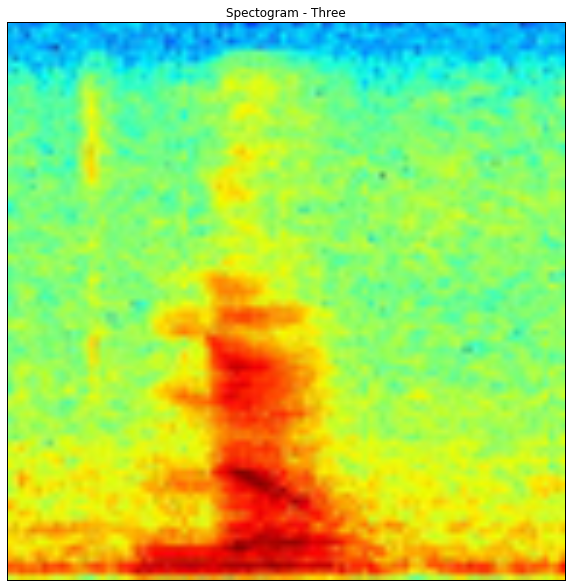

In [29]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Three')
ax1.imshow(training_examples[6])#, aspect='auto', origin='lower')

In [30]:
# Maybe convert for speed
validation_examples = (validation_examples / 255).astype('float32')
# validation_examples = (validation_examples).astype('float32')

In [31]:
# # for idx, t in enumerate(training_examples):
# #     training_examples[idx] = t / 255
# # training_examples = training_examples.astype('float32')

# ## For some reason I get a memory error when I try this code below, so I just iterate above instead


training_examples = (training_examples / 255).astype('float32')
# training_examples = (training_examples).astype('float32')

In [32]:
print (training_examples[0])

[[[0.0627451  0.84705883 0.96862745]
  [0.         0.54901963 0.9137255 ]
  [0.01568628 0.5803922  1.        ]
  ...
  [0.18039216 0.9019608  1.        ]
  [0.01176471 0.49411765 0.7058824 ]
  [0.1254902  0.8862745  0.9764706 ]]

 [[0.04705882 0.9098039  0.9647059 ]
  [0.         0.73333335 0.9529412 ]
  [0.00784314 0.62352943 0.89411765]
  ...
  [0.06666667 0.9529412  0.8745098 ]
  [0.05882353 0.95686275 0.93333334]
  [0.02352941 0.9137255  0.9764706 ]]

 [[0.00784314 0.53333336 0.98039216]
  [0.12941177 0.8235294  0.99215686]
  [0.         0.7647059  0.8862745 ]
  ...
  [0.04705882 0.9647059  0.9019608 ]
  [0.0627451  0.9647059  0.9137255 ]
  [0.01960784 0.84705883 0.8862745 ]]

 ...

 [[0.654902   0.99215686 0.30980393]
  [0.61960787 0.9843137  0.3254902 ]
  [0.6        0.9843137  0.3529412 ]
  ...
  [0.8627451  0.9647059  0.10196079]
  [0.88235295 0.95686275 0.09803922]
  [0.9019608  0.8745098  0.07058824]]

 [[0.6156863  0.99215686 0.27450982]
  [0.6509804  1.         0.3529412 ]


In [33]:
def create_training_input_fn(features, labels, batch_size):#, num_epochs=None, shuffle=True):

  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x=features,
      y=labels,
      batch_size=batch_size,
      num_epochs=None,
      shuffle=True)

  return train_input_fn

In [34]:
def create_predict_input_fn(features, labels, batch_size):

  predict_input_fn = tf.estimator.inputs.numpy_input_fn(
      x=features,
      y=labels,
      num_epochs=1,
      shuffle=False)

  return predict_input_fn

In [35]:
def mobilenet_model_fn(features, labels, mode, params):
    # Load mobilenet model.
    module = hub.Module("https://tfhub.dev/google/imagenet/mobilenet_v2_035_96/feature_vector/1")#imagenet/inception_v3/feature_vector/1")
#     module = params["module"]
#     input_layer = adjust_image(features["x"])
#     outputs = module(input_layer)
    input_layer = features
    outputs = module(input_layer)

    logits = tf.layers.dense(inputs=outputs, units=len(POSSIBLE_LABELS))#-1)#12) ### was 10 ####-1 because of unknown

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=params["learning_rate"])#0.001)
        optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)###added
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [43]:
def train_tfhub_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    model_directory,
    periods,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a neural network classification model for the MNIST digits dataset.
  
  In addition to training, this function also prints training progress information,
  a plot of the training and validation loss over time, as well as a confusion
  matrix.
  
  Args:
    learning_rate: An `int`, the learning rate to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    training_examples: A `DataFrame` containing the training features.
    training_targets: A `DataFrame` containing the training labels.
    validation_examples: A `DataFrame` containing the validation features.
    validation_targets: A `DataFrame` containing the validation labels.
      
  Returns:
    The trained `Classifier` object.
  """

  ## Data logging in terminal
  tf.logging.set_verbosity(tf.logging.INFO)
        # Set up logging for predictions
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
            tensors=tensors_to_log, every_n_iter=10)    

  # Caution: input pipelines are reset with each call to train. 
  # If the number of steps is small, your model may never see most of the data.  
  # So with multiple `.train` calls like this you may want to control the length 
  # of training with num_epochs passed to the input_fn. Or, you can do a really-big shuffle, 
  # or since it's in-memory data, shuffle all the data in the `input_fn`.
  steps_per_period = steps // periods  
  
  # Create the input functions.
  predict_training_input_fn = create_predict_input_fn(
    training_examples, training_targets, batch_size)
  predict_validation_input_fn = create_predict_input_fn(
    validation_examples, validation_targets, batch_size)
  training_input_fn = create_training_input_fn(
    training_examples, training_targets, batch_size)

  # Create feature columns.
#   feature_columns = [tf.feature_column.numeric_column('pixels', shape=784)]

#   my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
#   my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

#   my_optimizer = tf.train.AdagradOptimizer(learning_rate=0.05)
#   my_optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
#   my_optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001)

  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    
    
  # Create the Estimator                        ## ADDED params so that I can pass values to model
  classifier = tf.estimator.Estimator(
    model_fn=mobilenet_model_fn, model_dir=model_directory, params={
        'learning_rate': learning_rate,
        'optimizer' : my_optimizer,
#         'module' : module
#         'feature_columns': my_feature_columns,
#         # Two hidden layers of 10 nodes each.
#         'hidden_units': [10, 10],
#         # The model must choose between 3 classes.
#         'n_classes': 3,
    })

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss error and accuracy (on validation data):")
  training_errors = []
  validation_errors = []
  for period in range (0, periods):
  # Train the model, starting from the prior state.

      # Train the model
    classifier.train(
              input_fn=training_input_fn,
              steps=steps_per_period,#,#000,#20000,
              hooks=[logging_hook]
            )
    
    eval_results = classifier.evaluate(input_fn=predict_validation_input_fn)
    print(eval_results)
    
    # Compute training and validation errors.
    training_log_loss = classifier.evaluate(input_fn=predict_training_input_fn)['loss']
    validation_log_loss = eval_results['loss']
    # Occasionally print the current loss.
    print("  period %02d : %0.2f     Accuracy: %02f" % (period, validation_log_loss, eval_results['accuracy']))
    # Add the loss metrics from this period to our list.
    training_errors.append(training_log_loss)
    validation_errors.append(validation_log_loss)
  print("Model training finished.")
  # Remove event files to save disk space.
#   _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))
  
  # Calculate final predictions (not probabilities, as above).
  final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
  final_predictions = np.array([item['classes'] for item in final_predictions])
  
  
  accuracy = metrics.accuracy_score(validation_targets, final_predictions)
  print("Final accuracy (on validation data): %0.2f" % accuracy)

  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.plot(training_errors, label="training")
  plt.plot(validation_errors, label="validation")
  plt.legend()
  plt.show()
  
  # Output a plot of the confusion matrix.
  cm = metrics.confusion_matrix(validation_targets, final_predictions)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

  return classifier

Training model...
LogLoss error and accuracy (on validation data):
{'accuracy': 0.8380414, 'loss': 0.45870775, 'global_step': 100}
  period 00 : 0.46     Accuracy: 0.838041
{'accuracy': 0.8700565, 'loss': 0.38793764, 'global_step': 200}
  period 01 : 0.39     Accuracy: 0.870057
{'accuracy': 0.873823, 'loss': 0.35527095, 'global_step': 300}
  period 02 : 0.36     Accuracy: 0.873823
{'accuracy': 0.873823, 'loss': 0.33618823, 'global_step': 400}
  period 03 : 0.34     Accuracy: 0.873823
{'accuracy': 0.88323915, 'loss': 0.32080743, 'global_step': 500}
  period 04 : 0.32     Accuracy: 0.883239
{'accuracy': 0.8851224, 'loss': 0.3097167, 'global_step': 600}
  period 05 : 0.31     Accuracy: 0.885122
{'accuracy': 0.8926554, 'loss': 0.3007472, 'global_step': 700}
  period 06 : 0.30     Accuracy: 0.892655
{'accuracy': 0.8851224, 'loss': 0.29982844, 'global_step': 800}
  period 07 : 0.30     Accuracy: 0.885122
{'accuracy': 0.8907721, 'loss': 0.28984302, 'global_step': 900}
  period 08 : 0.29     A

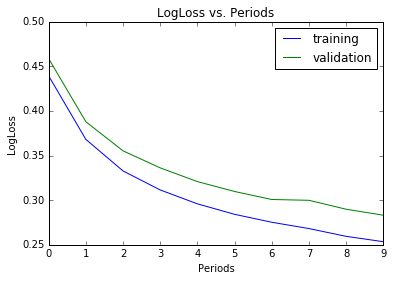

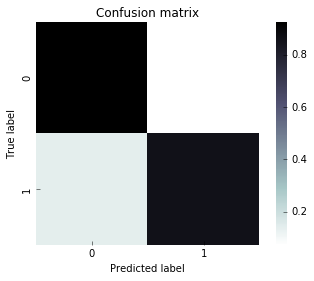

CPU times: user 1h 11min 14s, sys: 3min 11s, total: 1h 14min 25s
Wall time: 15min 7s


In [45]:
%%time
tfhub_classifier = train_tfhub_classification_model(
    learning_rate=.001,#0.001,#0.05,
    steps=1000,#1000,
    batch_size=64,
    hidden_units=[5],
    model_directory="./mobilenet_v6/sound_yes_no_nice_graph1",#Remember to change directory right after you run model
    periods = 10,#5,#2# was 10,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [ ]:
# creat_checkpoint(notebook_id) #could automatically create save

In [ ]:
# ###test
# pic = img_to_arr(os.path.join(DATADIR, 'picts/test/clip_eb9c403fc.jpg'))

# fig = plt.figure(figsize = (10,10))
# ax1 = fig.add_subplot(111)
# ax1.set_xticks([])
# ax1.set_yticks([])

# ax1.set_title('Spectogram - Three')
# ax1.imshow(pic)#, aspect='auto', origin='lower')
# print(pic.shape)

In [ ]:
## Grab data here
# TESTDATADIR = 
def load_test_data(data_dir):
    """ Return 2 lists of tuples:
    [(class_id, user_id, path), ...] for train
    [(class_id, user_id, path), ...] for validation
    """
    # Just a simple regexp for paths with three groups:
    # prefix, label, user_id
    pattern = re.compile("(.+\/)?(\w+)\/([^_]+)_.+jpg")
    all_files = glob(os.path.join(data_dir, 'picts/test/*jpg'))#changed

    possible = set(POSSIBLE_LABELS)
    test = []
    for entry in all_files:
        r = re.match(pattern, entry)
        if r:
            sample = (entry[-len('clip_cec9bf1c6.jpg'):-4], entry)
#             print(entry[-len('clip_cec9bf1c6.jpg'):-3])
            test.append(sample)
            
    print('There are {} test samples'.format(len(test)))
    return test

testset = load_test_data(DATADIR)

In [ ]:
print(testset[158537][0], testset[158537][1])

In [ ]:
test_examples = []
for i in testset[0:300]:
    #append features i[1] = path to wav file
    new3 = img_to_arr(i[1])
    test_examples.append(new3)
    
test_examples = np.array(test_examples)

In [ ]:
test_examples = (test_examples / 255).astype('float32')

In [ ]:
# ## Maybe divide by 255
# # test_examples = test_examples / 255

# for idx, t in enumerate(test_examples):
#     test_examples[idx] = t / 255
# test_examples = test_examples.astype('float32')

In [ ]:
print(test_examples[20])

In [ ]:
predict_test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x=test_examples,
  num_epochs=1,
  shuffle=False)

test_predictions = tfhub_classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])
  
# accuracy = metrics.accuracy_score(test_targets, test_predictions)
# print("Accuracy on test data: %0.2f" % accuracy)

In [ ]:
print(test_predictions)

In [ ]:
new = pd.read_csv("data/sample_submission.csv", sep=",")
print(new[:10])
print(testset[0])
# for label in test_predictions:#labeles are numbers
#     #concat as 'unknown'
#     if label not in POSSIBLE_LABELS:
#         label = 'unknown'
#     else:
#         #concatinate a list
#         label = POSSIBLE_LABELS[label]

In [ ]:
# # fname,label
# print(len(test_predictions))
# new = pd.concat([mnist_test_sample_dataframe['fname'], new], axis=1)###Not this, but example of how to create
# print(new)

In [ ]:
new.to_csv('speech_predictions.csv', index=False)